In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib notebook

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
p08 = pd.read_csv("../../home/lucas/Descargas/properati-AR-2017-08-01-properties-rent-six_months.csv",\
                  infer_datetime_format=True)

In [13]:
#Miramos un poco que datos tenemos y procedemos a limpiarlos
p08.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,57df5f7e24ecc7231a698adcefbdbba413e08901,2017-02-01,rent,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9494718,-60.6316587",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boi_alquiler_dep...,"EXCELENTE DEPARTAMENTO DE 2 DORMITORIOS, PISO ...",J.M. DE ROSAS 929 - 2 DORMITORIOS,https://thumbs4.properati.com/6/qX-hlMZ1XwGXI5...
1,b7d96e89c2effc24d3659bf4f01405586724758b,2017-02-01,rent,PH,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7676473285,-58.3859923587",...,4.0,NaN,1500.000000,NaN,NaN,NaN,http://www.properati.com.ar/15boj_alquiler_ph_...,BUEN PH EN ALQUILER EN TEMPERLEY ESTE. o 15440...,"BUEN PH , 3 ambientes ,EN ALQUILER en TEMPERLE...",https://thumbs4.properati.com/4/RDuQelGI1qnJmT...
2,48f63c9a441b5a66343abbae885a97d50ca8cb49,2017-02-01,rent,house,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,Bs.As. G.B.A. Zona Oeste,3433780.0,"-34.6501160392,-58.9660339715",...,304.0,6.051118,107.894737,NaN,NaN,NaN,http://www.properati.com.ar/15bri_alquiler_cas...,CASA EN ALQUILER ANUAL CON OPCION A COMPRA- A...,"CASA ALQUILER ANUAL- EL NACIONAL, GRAL. RODRIGUEZ",https://thumbs4.properati.com/2/PPXbmserGHUVdC...


In [14]:
p08.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [15]:
#Vemos un poco los tipos de datos que hay
p08['created_on'] = p08['created_on'].apply(pd.to_datetime)

In [17]:
p08.dtypes
p08.head(2)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,57df5f7e24ecc7231a698adcefbdbba413e08901,2017-02-01,rent,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9494718,-60.6316587",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boi_alquiler_dep...,"EXCELENTE DEPARTAMENTO DE 2 DORMITORIOS, PISO ...",J.M. DE ROSAS 929 - 2 DORMITORIOS,https://thumbs4.properati.com/6/qX-hlMZ1XwGXI5...
1,b7d96e89c2effc24d3659bf4f01405586724758b,2017-02-01,rent,PH,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,"-34.7676473285,-58.3859923587",...,4.0,NaN,1500.0,NaN,NaN,NaN,http://www.properati.com.ar/15boj_alquiler_ph_...,BUEN PH EN ALQUILER EN TEMPERLEY ESTE. o 15440...,"BUEN PH , 3 ambientes ,EN ALQUILER en TEMPERLE...",https://thumbs4.properati.com/4/RDuQelGI1qnJmT...


In [32]:
#Vemos los tipos de operaciones disponibles
p08.groupby('operation')
#Sólo tenemos operaciones del tipo 'rent'

,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
operation,,,,,,,,,,,,,,,,,,,,,
rent,18492,18492,18492,18488,18492,18492,18492,15500,11760,11760,...,14106,10207,12954,1338,6328,3374,18492,18491,18492,18138


In [33]:
#Buscamos en otros archivos a ver si existen otro tipo de operaciones
ps08 = pd.read_csv('../../home/lucas/Descargas/properati-AR-2017-08-01-properties-sell-six_months.csv')

In [34]:
ps08.head(3)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [35]:
ps08.dtypes

id                             object
created_on                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbn

In [44]:
#Vemos que tipo de operaciones tienen
print("cantidad de registro:"+str(ps08.count()['id']))
print("cantidad de operaciones: "+str(ps08.groupby('operation').count()['id']))
#Las operaciones son todas sell y coinciden con la cantidad de registros

cantidad de registro:121220
cantidad de operaciones: operation
sell    121220
Name: id, dtype: int64


In [45]:
#Transformamos las fechas
ps08['created_on'] = ps08['created_on'].apply(pd.to_datetime)

In [47]:
ps08.head(2)
ps08.dtypes

id                                    object
created_on                    datetime64[ns]
operation                             object
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [55]:
#Como este archivo corresponde a agosto limpiamos los registros correspondientes a otros meses
ps08 = ps08[(ps08['created_on'] >= '2017-08-01') & (ps08['created_on'] <= '2017-08-31')]
ps08.head(5)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
120867,0582b4e7b99b299008b2502ee7d134cbbff99aea,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,160.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig5_venta_depart...,Excelente piso sobre Av. Alber...,Departamento - Caballito,https://thumbs4.properati.com/4/-31MEB4-qkkrEr...
120868,376987444d049f2fdb33b0d984a7331686d7a9a7,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig6_venta_depart...,Semipiso de 3 ambientes todo r...,Departamento - Caballito,https://thumbs4.properati.com/1/JEuG0GTRN1cGe3...
120869,ed24015ec0dc382a8ec233b3340988e888593f9f,2017-08-01,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,...,142.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig7_venta_depart...,Piso de 4 ambientes con depend...,Departamento - Caballito,https://thumbs4.properati.com/9/OnrB2dOwaG-cG5...
120870,b8e58f31cbb01828e583e0f47413d8701424e980,2017-08-01,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,...,34.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig8_venta_depart...,IMPECABLE TORRE COY III – DEPA...,Departamento - Palermo Soho,https://thumbs4.properati.com/6/M8EZL8DFe9Fb8t...
120871,ca5bec2573400220c2bd7690d85a85506c56308e,2017-08-01,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cig9_venta_depart...,IMPECABLE TORRE COY III – HERM...,Departamento - Palermo Soho,https://thumbs4.properati.com/1/lQgj0j1UMVlAQj...


In [57]:
ps08.groupby('state_name').count()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
state_name,,,,,,,,,,,,,,,,,,,,,
Bs.As. G.B.A. Zona Norte,46,46,46,46,46,46,46,42,0,0,...,44,29,37,0,0,8,46,46,46,45
Bs.As. G.B.A. Zona Oeste,8,8,8,8,8,8,8,8,0,0,...,7,1,1,0,0,0,8,8,8,7
Bs.As. G.B.A. Zona Sur,13,13,13,13,13,13,13,11,0,0,...,13,5,11,0,0,3,13,13,13,13
Buenos Aires Costa Atlántica,3,3,3,3,3,3,3,1,0,0,...,3,2,3,0,0,1,3,3,3,3
Capital Federal,192,192,192,192,192,192,192,188,38,38,...,186,48,54,0,0,31,192,192,192,188
Corrientes,1,1,1,1,1,1,1,1,0,0,...,1,1,1,0,0,1,1,1,1,1
Córdoba,58,58,58,58,58,58,58,58,1,1,...,6,50,4,0,0,1,58,58,58,19
Mendoza,2,2,2,2,2,2,2,2,0,0,...,2,1,2,0,0,2,2,2,2,2
San Luis,1,1,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,1,1,1,1


In [60]:
#Filtramos las propiedades de capital federal
ps08 = ps08[ps08['state_name'].str.contains('ederal')]['state_name'].count()

192

In [62]:
#Tenemos sólo 192 propiedades de capital federal
ps08 = ps08[ps08['state_name'].str.contains('ederal')]

# ¿De qué tamaño son las propiedades más demandadas?¿A qué barrios/comunas corresponden?

In [64]:
#Hacemos un analisis preliminar para el mes de agosto
#Vemos lo que tenemos por ahora
ps08.head(2)
ps08.dtypes

id                                    object
created_on                    datetime64[ns]
operation                             object
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [115]:
more_d = ps08.groupby('surface_total_in_m2').count().sort_values('id',ascending=False)[["surface_covered_in_m2"]]
#more_d.reset_index
more_d

,surface_covered_in_m2
surface_total_in_m2,
39.0,27
46.0,21
38.0,16
71.0,11
62.0,6
51.0,5
35.0,2
37.0,4
121.0,4


<IPython.core.display.Javascript object>


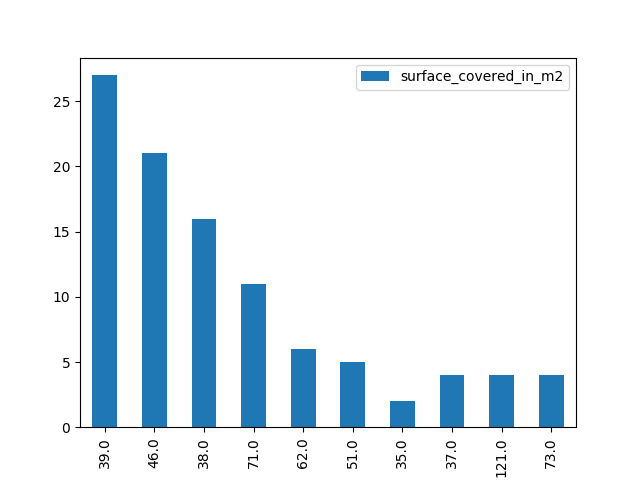

In [117]:
#Para agosto:
#La mayor cantidad de propiedades vendidas corresponde a las comprendidas entre los 38m2 y los 46m2.
more_d.head(10).plot.bar()

In [118]:
ps08.to_csv("../../home/lucas/academico/datos/tp1/properati-sell-processed-08.csv")